In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import utils as ut
import warnings
warnings.filterwarnings("ignore")

Aca me ubico en la carpeta de los archivos necesarios

In [4]:
%cd C:\\Users\\Familia Lara Pernia\\Desktop\\Proyecto2_SiniestrosViales_Henry
%pwd

C:\Users\Familia Lara Pernia\Desktop\Proyecto2_SiniestrosViales_Henry


'C:\\Users\\Familia Lara Pernia\\Desktop\\Proyecto2_SiniestrosViales_Henry'

Cargo archivos a trabajar

In [5]:
df = pd.read_csv("data/csv/accidentes_limpio.csv")
df2 = pd.read_csv("data/csv/bsas_pobla.csv")

RESUMEN DE DATOS

Para realizar nuestra EDA tomaremos los datos limpios desarrollados durante los procesos ETL. Para ver específicamente los procesos de transformación de variables, complementación de datos y manejo de datos nulos o faltantes, puede revisar la estructura realizada en los archivos ETL.

In [6]:
ut.data_summ(df)


Total filas:  716

Total filas nulas:  0

Total filas duplicadas:  0


,Columnas,Tipo_Dato,No_miss_Qty,%Missing,Missing_Qty
0,Hechos_Id,[<class 'str'>],716,0.0,0
1,Número De Victimas,[<class 'int'>],716,0.0,0
2,Fecha,[<class 'str'>],716,0.0,0
3,Año,[<class 'int'>],716,0.0,0
4,Mes,[<class 'str'>],716,0.0,0
5,Dia,[<class 'int'>],716,0.0,0
6,Día Semana,[<class 'str'>],716,0.0,0
7,Estación,[<class 'str'>],716,0.0,0
8,Hora,[<class 'str'>],716,0.0,0
9,Franja Horaria,[<class 'int'>],716,0.0,0


Analicemos inicialmente el número total de víctimas. Luego realizaremos un análisis detallado por franjas temporales.

In [7]:
total_victims = df['Número De Victimas'].sum()

print(f"El numero total de victimas es: {total_victims}")

El numero total de victimas es: 760


ANALISIS DE DATOS POR VARIABLES DE TIEMPO

Tenemos 760 víctimas. Ahora veamos la distribución de ese número de accidentes y víctimas por año.

Accidents and Victims by Year

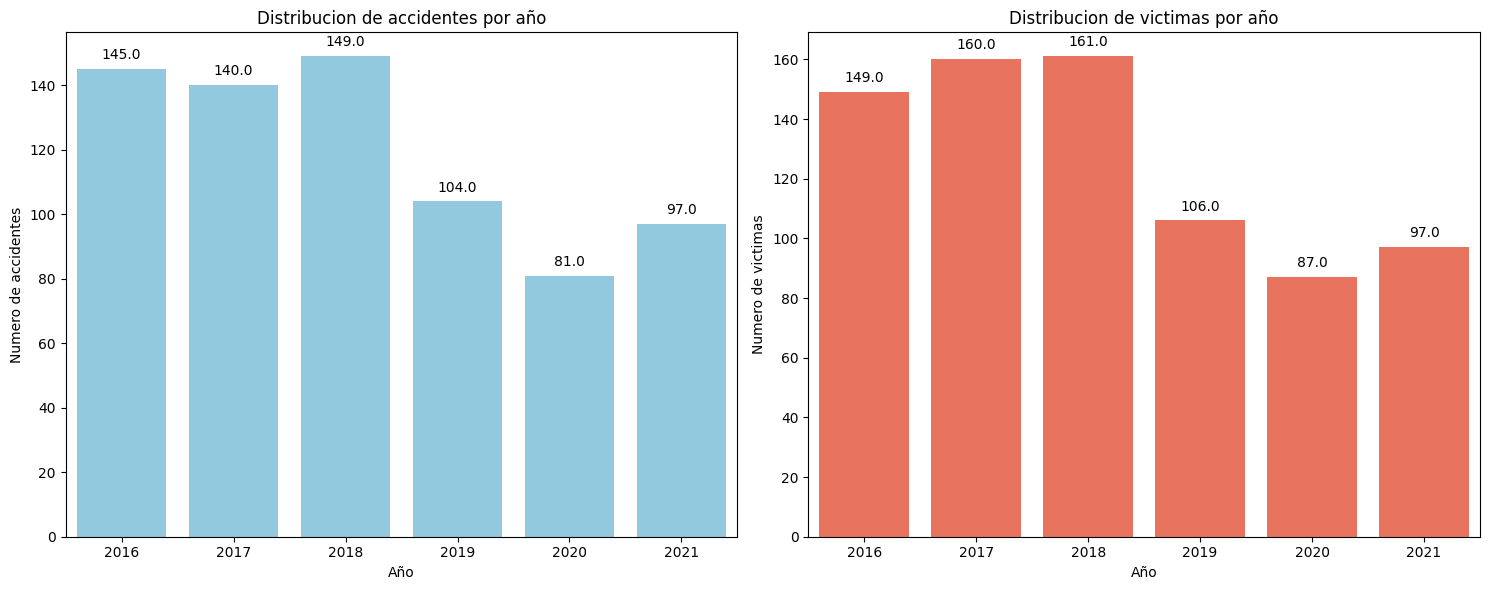

In [8]:
# Establecer el tamaño de la figura.
plt.figure(figsize=(15, 6))

# Subgraph 1: Distribución de Accidentes por Año
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Año', data=df, color='skyblue')

# Agregamos etiquetas
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribucion de accidentes por año')
plt.xlabel('Año')
plt.ylabel('Numero de accidentes')

# Subgraph 2: Distribucion de Vctimas por Año
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Año', y='Número De Victimas', data=df, color='tomato', estimator=sum, ci=None)

# Add Labels
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribucion de victimas por año')
plt.xlabel('Año')
plt.ylabel('Numero de victimas')

# Ajustamos el diseño
plt.tight_layout()

# Visualizamos
plt.show()

Vemos que en 2019 baja el número de víctimas y en 2020 baja bastante más que en años anteriores. Seguramente esto puede deberse a las restricciones de tránsito en las calles debido a la pandemia de COVID-19.

Accidentes y víctimas por mes

Veamos ahora el comportamiento del número de accidentes mes a mes para cada año.

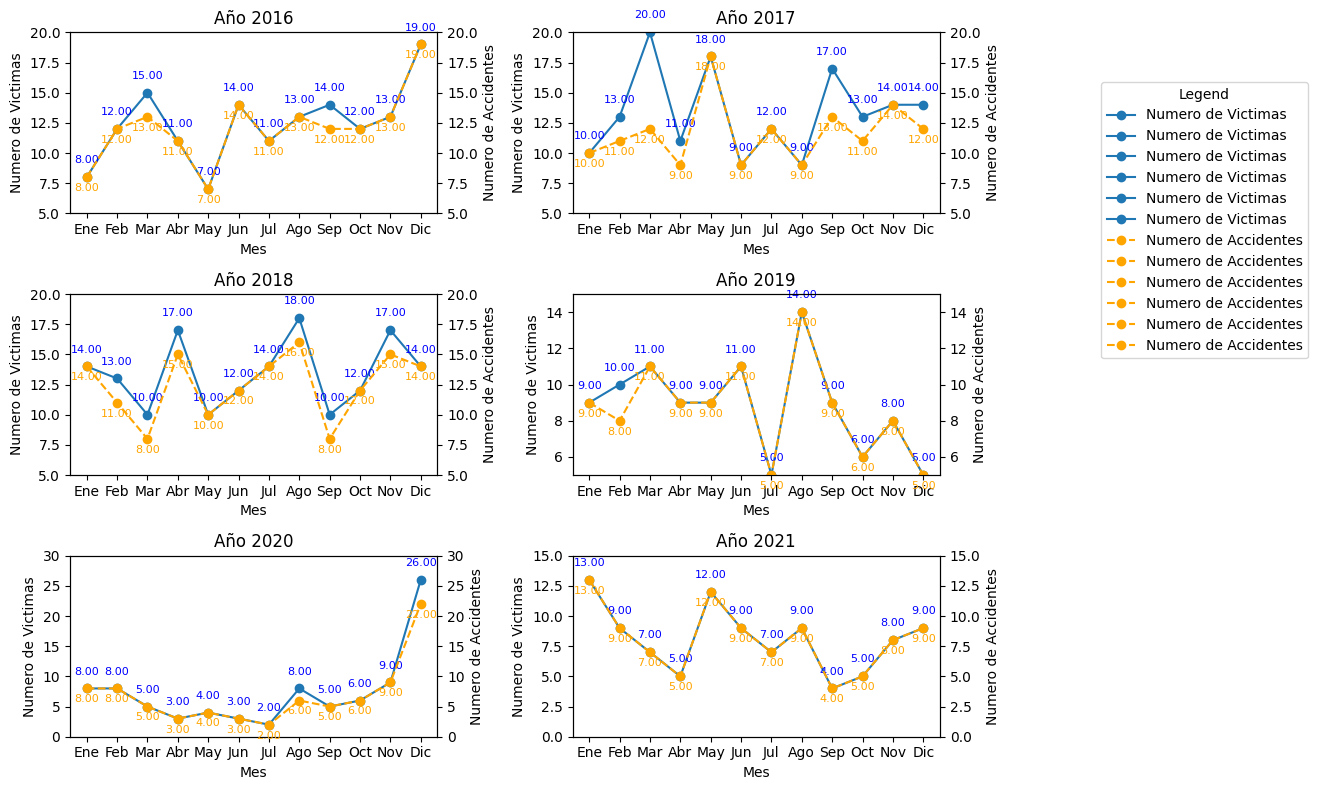

In [10]:
# Convertimos 'Mes' a tipo categórico con orden personalizado
order_month = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df['Mes'] = pd.Categorical(df['Mes'], categories=order_month, ordered=True)

# Definimos el número de filas y columnas para la cuadrícula del suborganigrama
n_filas = 3
n_columnas = 2

# Creamos la cuadrícula de subgrafo en una cuadrícula de 2x3
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(12, 8))

# Establecemos límites para cada gráfico
y_limits = [
    (5, 20),  # Plot 1-1
    (5, 20),  # Plot 1-2
    (5, 20),  # Plot 2-1
    (5, 15),  # Plot 2-2
    (0, 30),  # Plot 3-1
    (0, 15)   # Plot 3-2
]

# Iteramos a través de años y creamos un gráfico para cada año.
for i, año in enumerate(df['Año'].unique()):
    fila = i // n_columnas
    columna = i % n_columnas
    
    # Filtramos datos para el año actual y agrupamos por mes.
    monthly_data = (df[df['Año'] == año]
                    .groupby('Mes')
                    .agg({'Número De Victimas': 'sum', 'Mes': 'size'})
                    .rename(columns={'Número De Victimas': 'Numero de Victimas', 'Mes': 'Numero de Accidentes'})
                    .sort_values('Mes'))  
    
    # Configuramos la subtrama actual
    ax = axes[fila, columna]
    
    # Creamos líneas para 'Número De Víctimas' y 'Número de Accidentes'
    ax.plot(monthly_data.index.str[:3], monthly_data['Numero de Victimas'], marker='o', label='Numero de Victimas')
    
    # Creamos un segundo y-axis para 'Número de accidentes' en el mismo sistema de coordenadas
    ax2 = ax.twinx()
    ax2.plot(monthly_data.index.str[:3], monthly_data['Numero de Accidentes'], linestyle='dashed', marker='o', label='Numero de Accidentes', color='orange')
    
    # Configuramos títulos y etiquetas de ejes
    ax.set_title('Año ' + str(año))
    ax.set_xlabel('Mes')
    ax.set_ylabel('Numero de Victimas')
    
    # Configuramos la segunda y-axis
    ax2.set_ylabel('Numero de Accidentes')
    
    # Establecemos límites del y-axis para ambos y-axes
    ax.set_ylim(y_limits[i])
    ax2.set_ylim(y_limits[i])
    
    # Añadimos etiquetas a cada punto de las líneas 'Número De Víctimas'
    for x, y in zip(monthly_data.index.str[:3], monthly_data['Numero de Victimas']):
        ax.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='blue')

    # Agregamos etiquetas a cada punto en las líneas 'Número de accidentes'
    for x, y in zip(monthly_data.index.str[:3], monthly_data['Numero de Accidentes']):
        ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,-10), ha='center', fontsize=8, color='orange')

# Agregamos una única leyenda fuera de las subtramas.
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9), title='Legend')

# Visualizamos
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

Podemos observar una tendencia general (excepto en 2019) de que el número de accidentes y víctimas aumenta hacia los meses de noviembre y diciembre. Ademas vemos como meses como junio y julio tiende a picos mas bajos, justo en medio del invierno, epoca que suelen resguardarse un poco mas las familias.

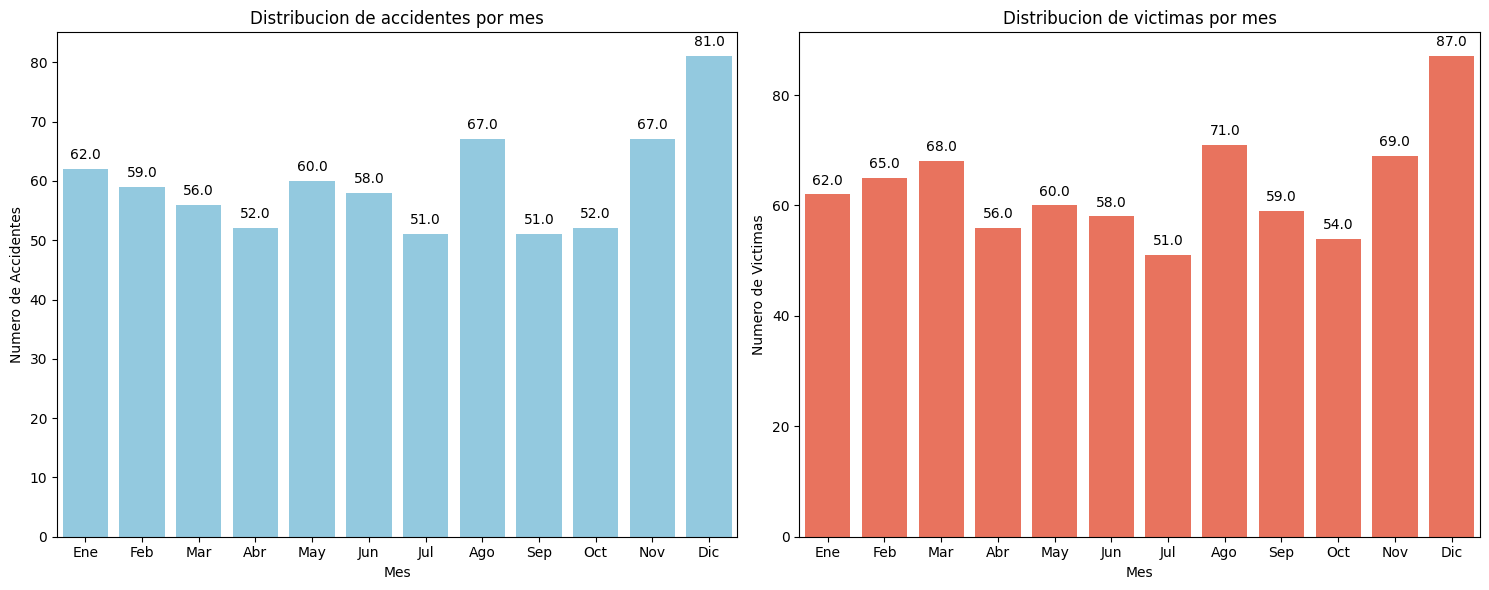

In [12]:
# Establecemos el tamaño de la figura.
plt.figure(figsize=(15, 6))

# Subplot 1: Distribución de Accidentes por Mes
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Mes', data=df, color='skyblue')

# Agregamos etiquetas
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribucion de accidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Numero de Accidentes')

# Modificamos las etiquetas del eje x para mostrar solo las primeras 3 letras de cada mes
ax1.set_xticklabels([month[:3] for month in df['Mes'].unique()])

# Subplot 2: Distribucion de Victimas por mes
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Mes', y='Número De Victimas', data=df, color='tomato', estimator=sum, ci=None)

# Agregamos etiquetas
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribucion de victimas por mes')
plt.xlabel('Mes')
plt.ylabel('Numero de Victimas')

#Modificamos las etiquetas del eje x para mostrar solo las primeras 3 letras de cada mes
ax2.set_xticklabels([month[:3] for month in df['Mes'].unique()])

# Ajustamos el diseño
plt.tight_layout()

# Show the plot
plt.show()

El gráfico discreto confirma efectivamente nuestra valoración, ya que vemos que en el mes de diciembre hay un mayor número de víctimas acumuladas (un 20% más que el mes siguiente con más víctimas y un 35% más que el promedio de víctimas por mes). 


Accidentes por temporada

Text(0, 0.5, 'Numero de Accidentes')

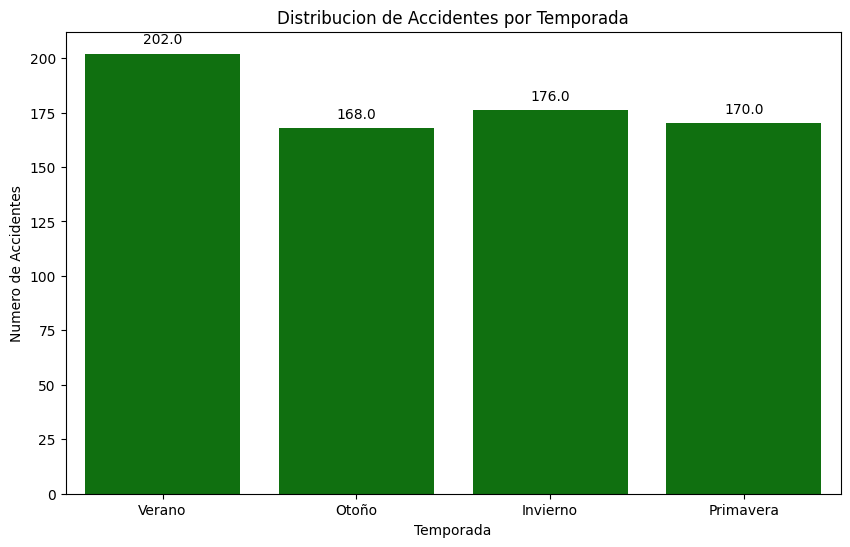

In [14]:
# Creamos un gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Estación', data=df, color='green')

# Añadimos etiquetas en cada barra.
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribucion de Accidentes por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Numero de Accidentes')

Vimos en los gráficos anteriores que la siniestralidad aumenta en el mes de diciembre, y el peso es tal que deja al verano como la estación con mayor número de accidentes

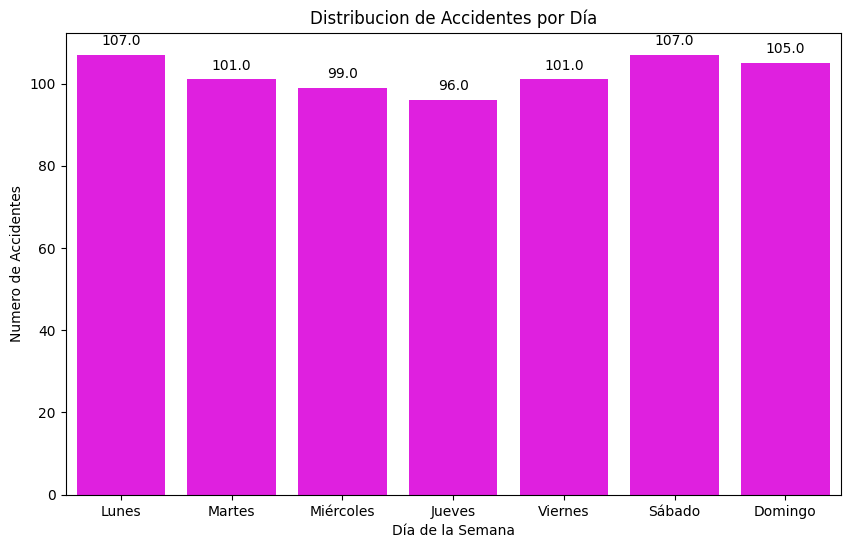

In [38]:
# Sort the days of the week in the desired order
week_order = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Día Semana', data=df, order=week_order, color='magenta')

# Add labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribucion de Accidentes por Día')
plt.xlabel('Día de la Semana')
plt.ylabel('Numero de Accidentes')
plt.show()


La distribución de accidentes es bastante similar en cada día de la semana, sin embargo, podemos ver un pequeño aumento especialmente en los días de fin de semana (viernes, sábado y domingo). Inclusive los lunes.

Accidentes por hora

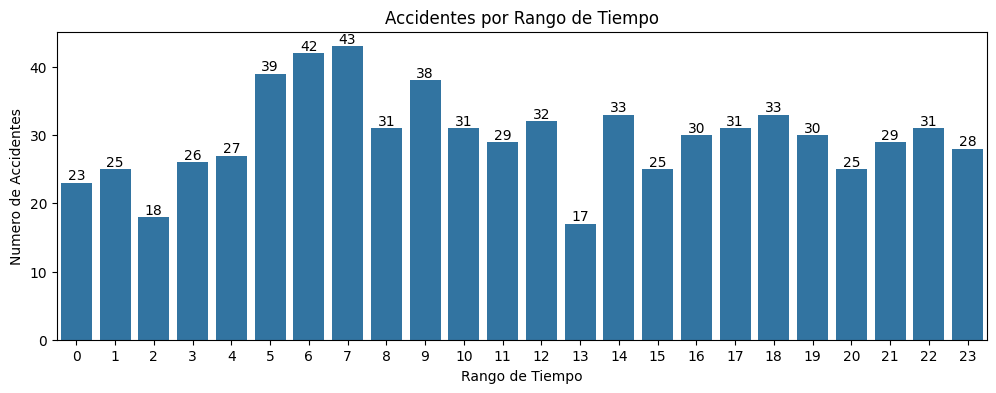

In [37]:
# The Number of Victims per hour is counted
data = df['Franja Horaria'].value_counts().reset_index()
data.columns = ['Franja Horaria', 'Número De Victimas']

# The data is ordered by hour
data = data.sort_values(by='Franja Horaria')

# The bar chart is created
plt.figure(figsize=(12, 4))
ax = sns.barplot(x='Franja Horaria', y='Número De Victimas', data=data)

ax.set_title('Accidentes por Rango de Tiempo')
ax.set_xlabel('Rango de Tiempo')
ax.set_ylabel('Numero de Accidentes')

# The quantities are added to the bars
for index, row in data.iterrows():
    ax.annotate(f'{row["Número De Victimas"]}', (row["Franja Horaria"], row["Número De Victimas"]), ha='center', va='bottom')

# Show graph
plt.show()

En cuanto a la hora de ocurrencia, podemos observar que definitivamente hay un aumento notable en el número de accidentes en las primeras horas de la mañana (entre las 5 y las 7 de la mañana).

Nos resulta útil ver una distribución que nos muestra el comportamiento de la accidentabilidad con las horas y días de la semana.

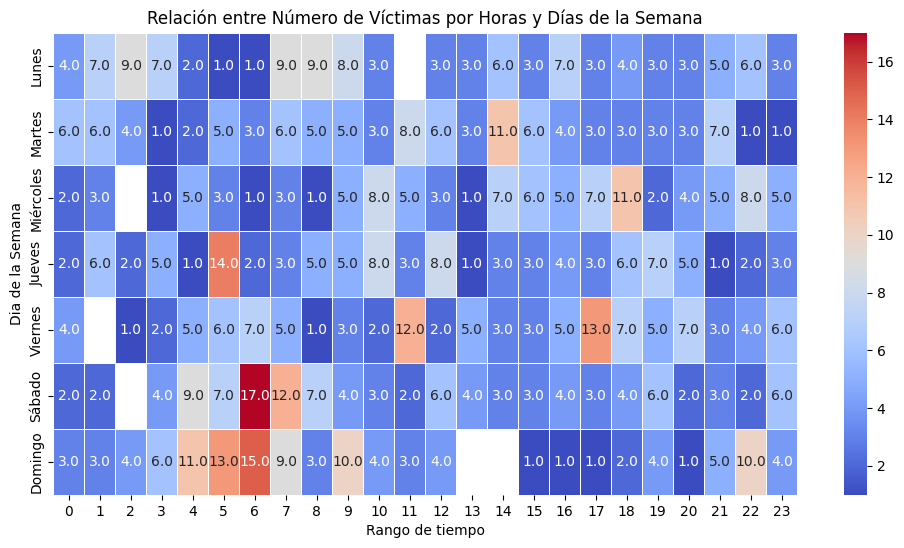

In [35]:
# Group the data by day of the week and time range, and sum the number of victims
data = df.groupby(['Día Semana', 'Franja Horaria'])['Número De Victimas'].sum().reset_index()

# Define the order of days of the week
orden_dias_semana = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

# Create a column 'Orden_dia_semana' to represent the numeric order of days of the week
data['Orden_dia_semana'] = data['Día Semana'].apply(lambda x: orden_dias_semana.index(x))

# Sort the DataFrame based on the numeric order of days of the week
data = data.sort_values(by='Orden_dia_semana')

# Create a pivot table for the data
pivot_data = data.pivot_table(index='Día Semana', columns='Franja Horaria', values='Número De Victimas', aggfunc='sum')

# Reorder the rows of the pivot table based on the order of days of the week
pivot_data = pivot_data.reindex(orden_dias_semana)

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a heatmap with Seaborn
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5)

# Set labels and title
plt.xlabel('Rango de tiempo')
plt.ylabel('Dia de la Semana')
plt.title('Relación entre Número de Víctimas por Horas y Días de la Semana')

# Show the plot
plt.show()

CONCLUSIONES

* Debido al cambio abrupto en el número de accidentes en 2019 y 2020, seguramente debido al Covid 19, no es posible encontrar una regularidad que permita medir con precisión el comportamiento de las tasas de accidentabilidad por año.
* En los últimos meses del año se puede encontrar un patrón de aumento en el número de accidentes, principalmente en diciembre.
* El peso de la accidentabilidad en diciembre se refleja en el número de accidentes en Verano, ya que esta temporada tiene un 4% más de accidentes que el resto de media
* Se encuentra relación en el aumento de accidentes los fines de semana en las primeras horas de la mañana

ANALISIS POR UBICACION Y VARIABLES GEOGRAFICAS

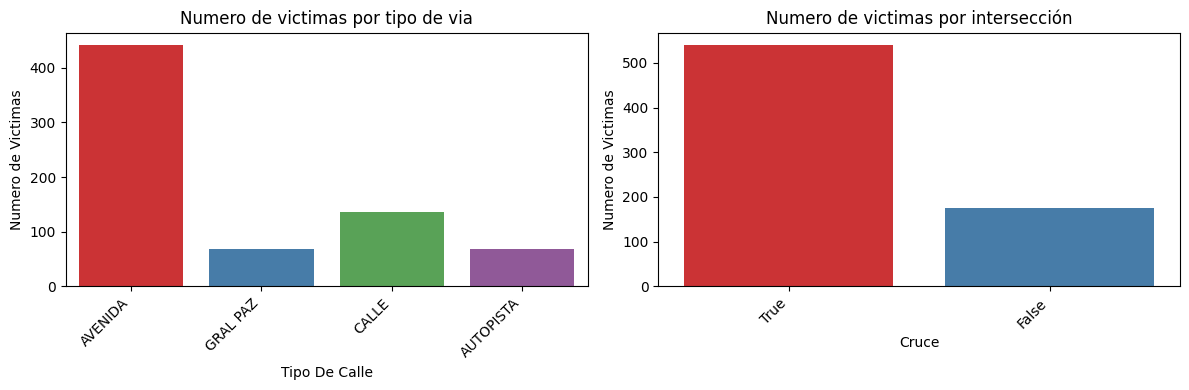

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Adjusted figure size

# First subplot
unique_colors_street_type = sns.color_palette("Set1", n_colors=len(df['Tipo De Calle'].unique()))
for i, street_type in enumerate(df['Tipo De Calle'].unique()):
    sns.countplot(data=df[df['Tipo De Calle'] == street_type], x='Tipo De Calle', ax=axes[0], color=unique_colors_street_type[i])

axes[0].set_title('Numero de victimas por tipo de via')
axes[0].set_ylabel('Numero de Victimas')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Second subplot
unique_colors_crossroad = sns.color_palette("Set1", n_colors=len(df['Cruce'].unique()))
for i, crossroad in enumerate(df['Cruce'].unique()):
    sns.countplot(data=df[df['Cruce'] == crossroad], x='Cruce', ax=axes[1], color=unique_colors_crossroad[i])

axes[1].set_title('Numero de victimas por intersección')
axes[1].set_ylabel('Numero de Victimas')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Podemos observar que la mayor cantidad de eventos con víctimas mortales ocurren en las avenidas y particularmente en las intersecciones de calles.

Análisis por comuna

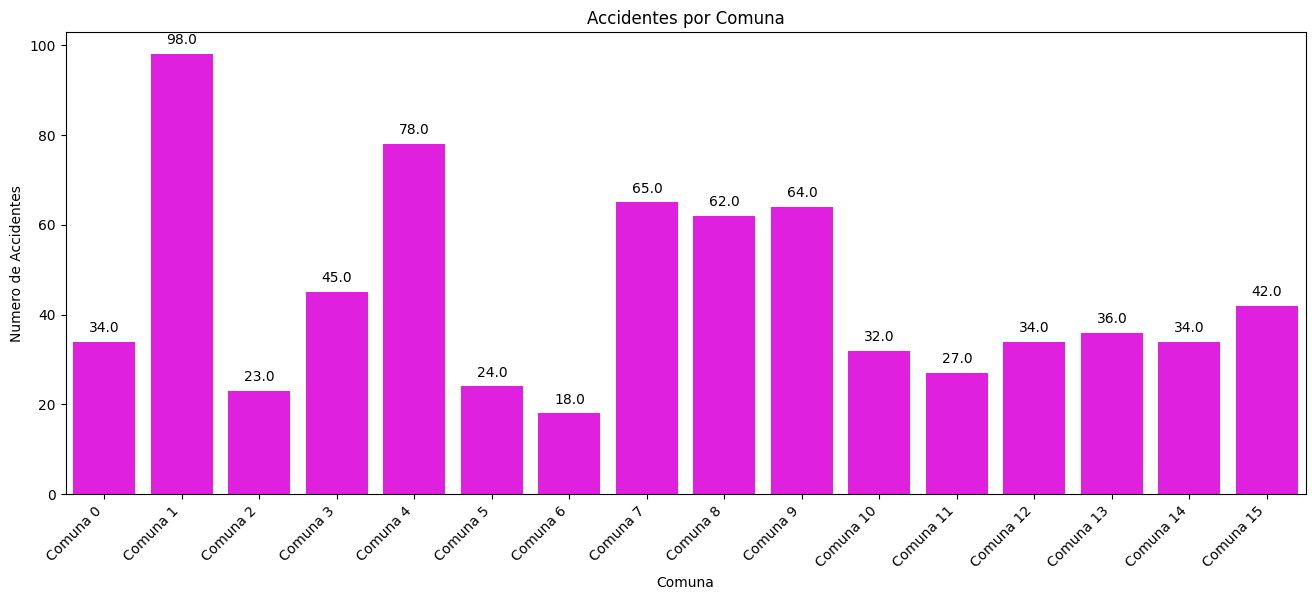

In [33]:
df['Comuna'] = pd.Categorical(df['Comuna'], categories=['Comuna 0', 'Comuna 1', 'Comuna 2', 'Comuna 3', 'Comuna 4', 'Comuna 5', 'Comuna 6', 'Comuna 7', 'Comuna 8', 'Comuna 9', 'Comuna 10', 'Comuna 11', 'Comuna 12', 'Comuna 13', 'Comuna 14', 'Comuna 15'], ordered=True)

# Create a bar chart sorted by 'Commune'
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='Comuna', data=df, color='magenta', order=df['Comuna'].cat.categories)

# Add labels and rotate x-axis labels for better readability
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

plt.title('Accidentes por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Numero de Accidentes')
plt.show()

Con 98 accidentes que representan el 13,6% del total de accidentes, la comuna 1 es la comuna con mayor número de accidentes en la ciudad.

El 51% de la accidentabilidad se encuentra en 5 de los 15 (16 contando los límites)

Análisis por Barrio

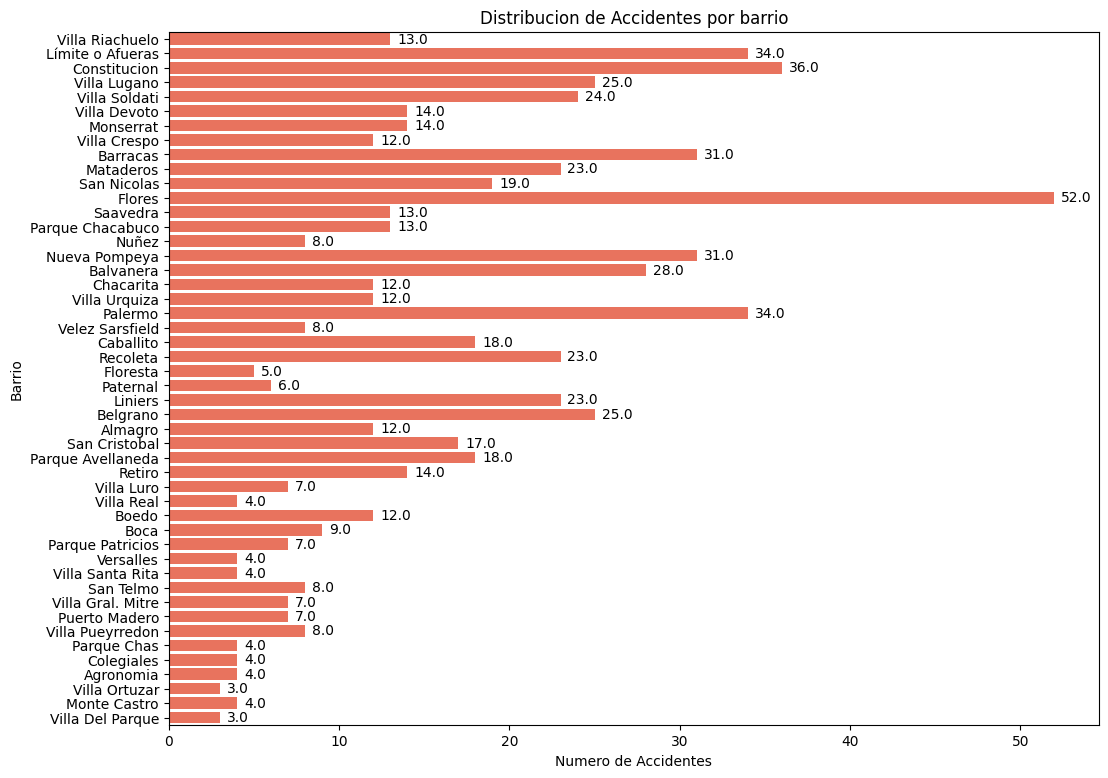

In [21]:
# Create a bar chart 
plt.figure(figsize=(12, 9))
ax = sns.countplot(y='Barrio', data=df, color='tomato', orient='horizontal')

# Add labels
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.title('Distribucion de Accidentes por barrio')
plt.xlabel('Numero de Accidentes')
plt.ylabel('Barrio')
plt.show()

Flores, Constitución y Palermo son los barrios con mayor número de accidentes.

Puede resultar interesante analizar la accidentabilidad de los barrios según la comuna a la que pertenecen.

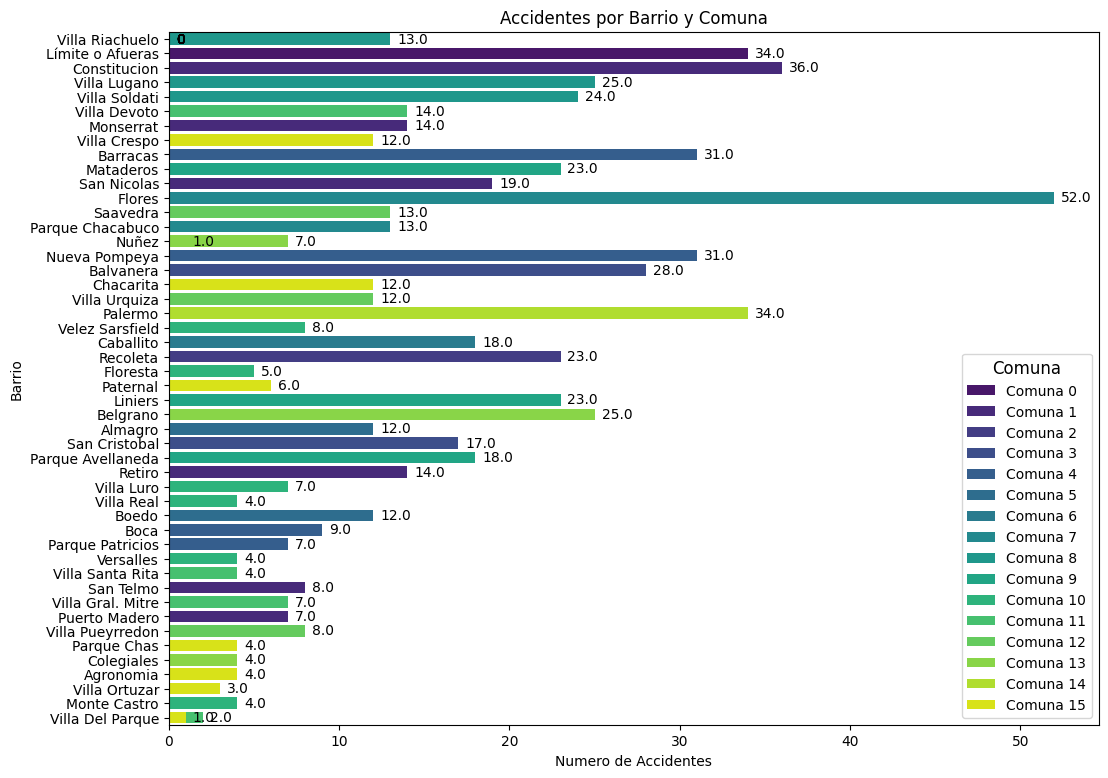

In [23]:
# Assign different colors to each commune
comuna_colors = sns.color_palette("viridis", n_colors=len(df['Comuna'].cat.categories))

# Create a bar chart organized by commune
plt.figure(figsize=(12, 9))
ax = sns.countplot(y='Barrio', data=df, hue='Comuna', palette=comuna_colors, orient='horizontal', dodge=False, saturation=1)

# Add Labels
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.title('Accidentes por Barrio y Comuna')
plt.xlabel('Numero de Accidentes')
plt.ylabel('Barrio')
plt.legend(title='Comuna', title_fontsize='12')
plt.show()

El barrio Flores con 52 accidentes registra el 80% de la accidentabilidad de la comuna 7 a la que pertenece

El barrio Constitución de la comuna 1 registra 36 accidentes, aproximadamente el 37% de la accidentabilidad de la comuna con más accidentes. Esto se debe a que también es la comuna que tiene más barrios.

Asimismo, la Comuna 4 registra el 80% de los accidentes en dos de sus cuatro barrios.

Conclusiones

* El mayor número de accidentes ocurren en avenidas y principalmente en cruces o intersecciones.

* Con 98 accidentes que representan el 13,6% del total de accidentes, la comuna 1 es la comuna con mayor número de accidentes en la ciudad.

* El 51% de la accidentabilidad se encuentra en 5 de los 15 (16 contando los límites)

* El barrio Constitución de la comuna 1 registra 36 accidentes, aproximadamente el 37% de la accidentabilidad de la comuna con más accidentes. Esto se debe a que también es la comuna que tiene más barrios.

* El mayor número de accidentes se acumula en barrios de mucha afluencia de autos, al contrario de los barrios mas pequeños y con menor poblacion que no presentan tantos accidentes.

ANALISIS DE DATOS DE LOS PARTICIPANTES EN ACCIDENTES.

Análisis por Género

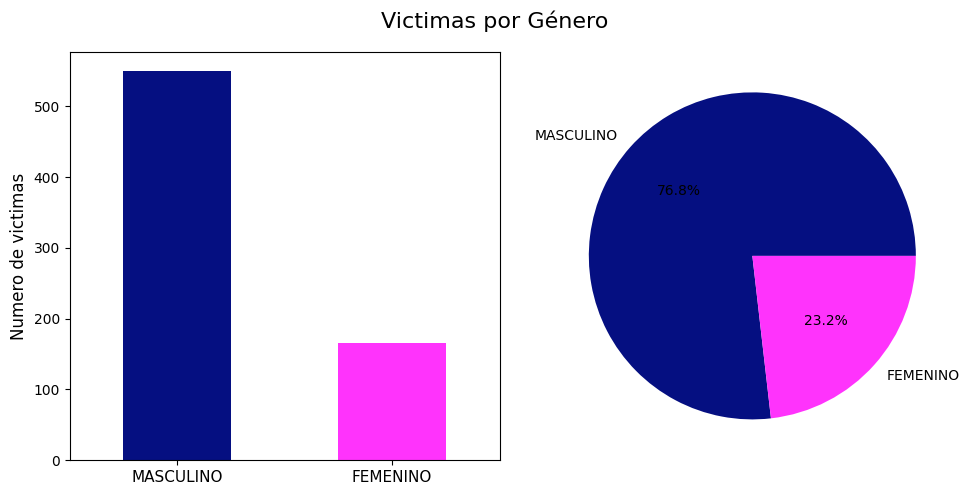

In [32]:
# Extract the count of victims by gender
victims_gender = df['Sexo'].value_counts()

# Set up a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(10, 5))

# Subplot 1: Bar chart for victims by gender
plt.subplot(1, 2, 1)
victims_gender.plot(kind='bar', color=['#050F81', '#FF33FC'])
plt.xlabel('')                              # No x-axis label
plt.ylabel('Numero de victimas', fontsize=12)
plt.xticks(rotation=0, fontsize=11)         # Rotate x-axis labels for better readability

# Subplot 2: Pie chart for victims by gender
plt.subplot(1, 2, 2)
victims_gender.plot(kind='pie', autopct='%1.1f%%', colors=['#050F81', '#FF33FC'])
plt.ylabel('')                              # No y-axis label

# Set the overall title for the figure
plt.suptitle('Victimas por Género', fontsize=16)

# Adjust the layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

El número de hombres implicados en un accidente es 3 veces mayor que el número de mujeres

Análisis por tipo de víctima

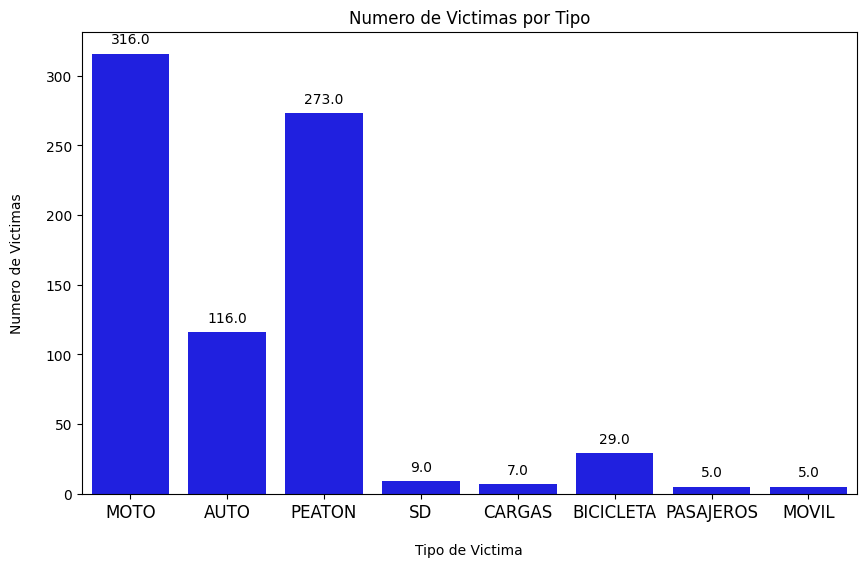

In [27]:
# Extract the count of victims by type
victim = df['Víctima'].value_counts()

# Define a color palette for the bar chart
palette = sns.color_palette("Blues", (len(victim) + 2))
palette = palette[::-1]  # Reverse the palette for better visualization

# Create a figure with a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Víctima', y='Número De Victimas', data=df, color='blue', estimator=sum, ci=None)

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title for better interpretation
plt.xlabel('\nTipo de Victima')
plt.ylabel('Numero de Victimas\n')
plt.title('Numero de Victimas por Tipo')

# Adjust the x-axis labels font size
plt.xticks(fontsize=12)

# Display the bar chart
plt.show()

Motociclistas y peatones suman 589 víctimas, equivalente al 77% del total de víctimas.

Podemos analizar número de víctimas por tipo de víctima y género

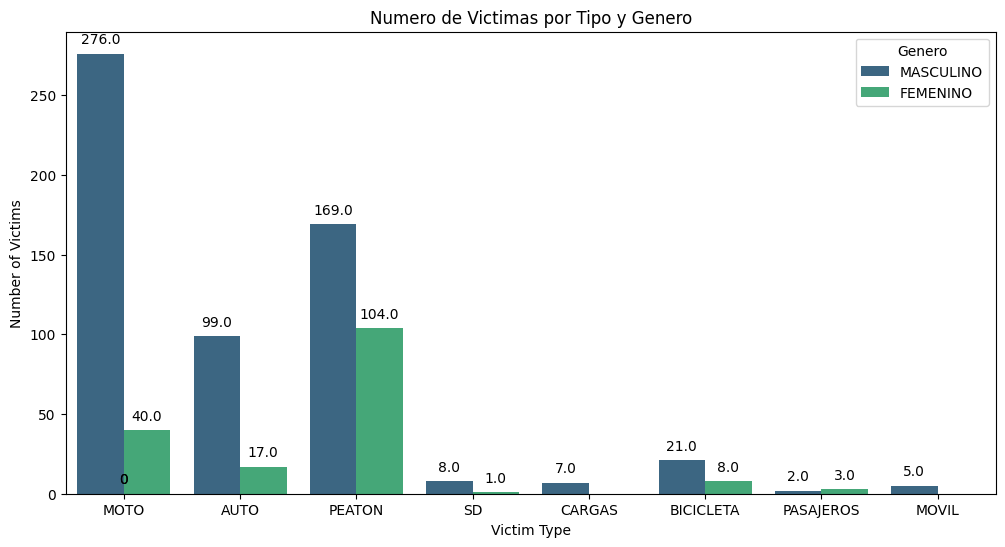

In [28]:
plt.figure(figsize=(12, 6))

# Create a grouped bar chart
ax = sns.barplot(x='Víctima', y='Número De Victimas', hue='Sexo', data=df, estimator=sum, ci=None, palette='viridis')

# Add labels
plt.title('Numero de Victimas por Tipo y Genero')
plt.xlabel('Victim Type')
plt.ylabel('Number of Victims')

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the legend
plt.legend(title='Genero', loc='upper right')

# Show the plot
plt.show()

El mayor número de hombres heridos son motociclistas, mientras que el mayor número de mujeres heridas son peatones.

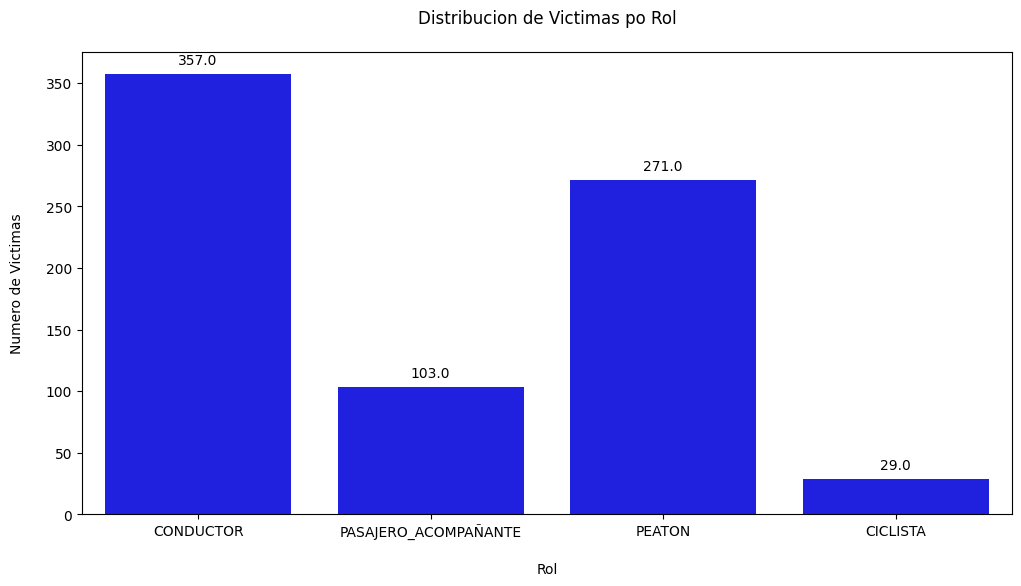

In [29]:
# Extract the count of victims by role
rol_victim = df['Rol'].value_counts()

# Define a color palette for the bar chart
palette = sns.color_palette("Blues", (len(rol_victim) + 1))
palette = palette[::-1]  # Reverse the palette for better visualization

# Create a figure with a bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Rol', y='Número De Victimas', data=df, color='blue', estimator=sum, ci=None)

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title for better interpretation
plt.xlabel('\nRol')
plt.ylabel('Numero de Victimas\n')
plt.title('Distribucion de Victimas po Rol\n')

# Display the bar chart
plt.show()

El 47% de las víctimas eran conductores (o ciclistas), el 35% eran peatones. el 18% restante se distribuye en diferentes roles

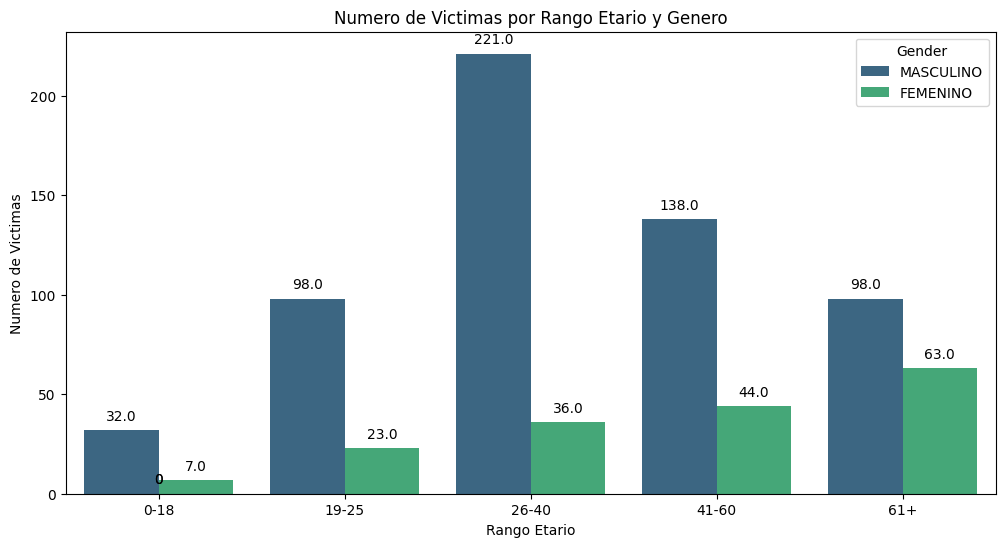

In [30]:
# Define the order of age categories for better visualization
order_age = ['0-18', '19-25', '26-40', '41-60', '61+']

# Assign the defined order to the 'Rango Etario' column
df['Rango Etario'] = pd.Categorical(df['Rango Etario'], categories=order_age, ordered=True)

# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a grouped bar chart
ax = sns.barplot(x='Rango Etario', y='Número De Victimas', hue='Sexo', data=df, estimator=sum, ci=None, palette='viridis')

# Add labels
plt.title('Numero de Victimas por Rango Etario y Genero')
plt.xlabel('Rango Etario')
plt.ylabel('Numero de Victimas')

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the legend
plt.legend(title='Gender', loc='upper right')

# Show the plot
plt.show()

El mayor número de víctimas son adultos de entre 26 y 40 años.

El mayor número de mujeres víctimas de accidentes viales son adultas mayores mayores de 61 años.

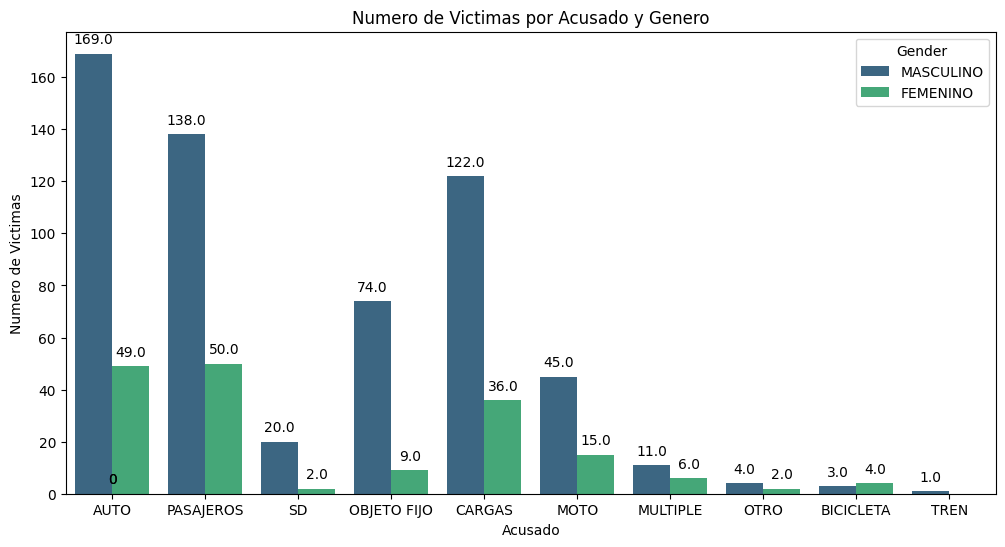

In [31]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a grouped bar chart
ax = sns.barplot(x='Acusado', y='Número De Victimas', hue='Sexo', data=df, estimator=sum, ci=None, palette='viridis')

# Add labels
plt.title('Numero de Victimas por Acusado y Genero')  # Corrected title
plt.xlabel('Acusado')  # Corrected x-axis label
plt.ylabel('Numero de Victimas')

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the legend
plt.legend(title='Gender', loc='upper right')

# Show the plot
plt.show()

El mayor número de accidentes fueron causados ​​por automóviles.

Sigue preocupando los accidentes causados ​​por pasajeros o lo que significa que un pasajero sea acusado

Conclusiones

* Motociclistas y peatones suman 589 víctimas, equivalente al 77% del total de víctimas.
* El número de hombres implicados en un accidente es 3 veces mayor que el número de mujeres
* El mayor número de hombres heridos son motociclistas, mientras que el mayor número de mujeres heridas son peatones.
* El 47% de las víctimas eran conductores y el 35% peatones. el 18% restante se distribuye en diferentes roles
* El mayor número de víctimas son adultos de entre 26 y 40 años.
* La mayoría de las mujeres víctimas de accidentes viales son adultas mayores mayores de 61 años.
* El mayor número de accidentes fueron provocados por coches